<a href="https://colab.research.google.com/github/JS0501/ESAA_YB3/blob/main/ESAA_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Simple Exploration Notebook - Instacart]**
###### In this notebook, we will try and explore the basic information about the dataset given. The dataset for this competition is a relational set of files describing customers' orders over time.

##### **Objective:**

###### The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.

###### For each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order.

###### Let us start by importing the necessary modules.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None # default='warn

##### **(1) color = sns.color_palette()**
##### - seaborn 라이브러리에서 색상 팔레트를 불러옴
##### - 미리 설정된 색상 팔레트를 반환
##### - 그래프나 차트에서 색상 지정

##### **(2) %matplotlib inline**
##### - Jupyter Notebook에서 사용하는 매직 명령
##### - matplotlib으로 생성된 차트나 그래프를 노트북 내에서 바로 표시하게 함
##### - 즉, 그래프가 출력 셀 아래에 바로 그려짐
##### - 이 설정이 없으면, plt.show() 명령어를 사용해야 함

##### **(3) pd.options.mode.chained_assignment = None**
##### - pandas 라이브러리에서 경고 메시지와 관련된 옵션을 제어
##### - None으로 설정하면 하나의 표현식에서 여러 번 데이터를 변경하거나 접근하여도 경고 메시지를 표시하지 않음
##### - 'warn': 경고 메시지 출력
##### - 'raise': 경고 대신 예외를 발생시

###### Let us list out the files that are present in this competition!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 from subprocess import check_output
 print(check_output(["dir","/content/drive/MyDrive"]).decode('utf8'))

aisles.csv			orders.csv
BBB3\ 6.ipynb			products.csv
Chapter1_ex1.ipynb		sample_submission.csv
Classroom			YB0307_Numpy_exercises.ipynb
code_upto_logistic.txt		YB0314(1)_grouping_occupation_Exercise.ipynb
Colab\ Notebooks		YB0314(2)_getting_and_knowing_occupation_Exercises.ipynb
departments.csv			빅분방3\ 13.ipynb
ESAA_2.ipynb			연습용.ipynb
ESAA_3.ipynb			영화\ 관객수.zip
ESAA_5.ipynb			영화_관객수\ 예측\ 모델.ipynb
ESAA_YB_WEEK1_assignment.ipynb	오사카.gmap
order_products__prior.csv	후쿠오카.gmap
order_products__train.csv



###### Before we dive deep into the exploratory analysis, let us know a little more about the files given. To understand it better, let us first read all the files as dataframe objects and then at the top few rows.

In [4]:
order_products_train_df = pd.read_csv("/content/drive/MyDrive/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/drive/MyDrive/order_products__prior.csv")
orders_df = pd.read_csv("/content/drive/MyDrive/orders.csv")
products_df = pd.read_csv("/content/drive/MyDrive/products.csv")
aisles_df = pd.read_csv("/content/drive/MyDrive/aisles.csv")
departments_df = pd.read_csv("/content/drive/MyDrive/departments.csv")

In [5]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


###### As we could see, orders.csv has all the information about the given order id like the user who has purchased the order, when was it purchased, days since prior order and so on.
###### The columns present in order_products_train and order_products_prior are same. Then what is the difference between these files?
###### As mentioned earlier, in this dataset, 4 to 100 orders of a customer are given (we will look at this later) and we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in order_products_prior file. We can also note that there is a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.
###### Order_products*csv file has more detailed information about the products that been bought in the given order along with the re-ordered status.
###### Let us first get the count of rows in each of the three sets.

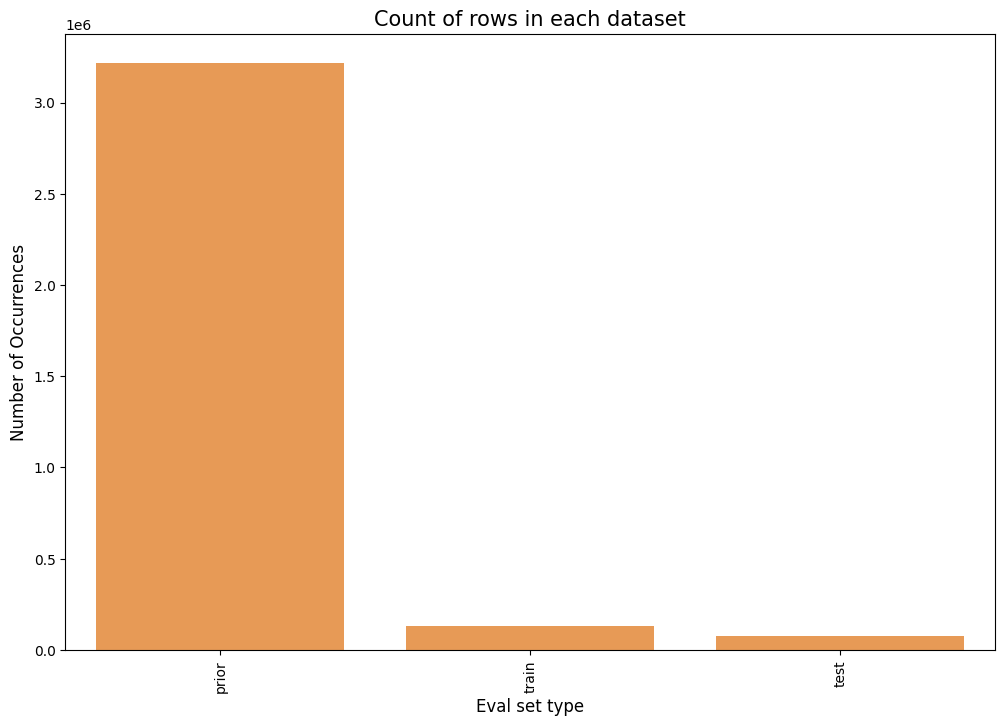

In [8]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

###### **sns.barplot에서 x=, y=으로 지정해줘야 함**

In [9]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


###### So there are 206,209 customers in total. Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers.
###### Now let us validate the claim that 4 to 100 orders of a customer are given.

<ipython-input-10-7796efdf96c6>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(max).reset_index()


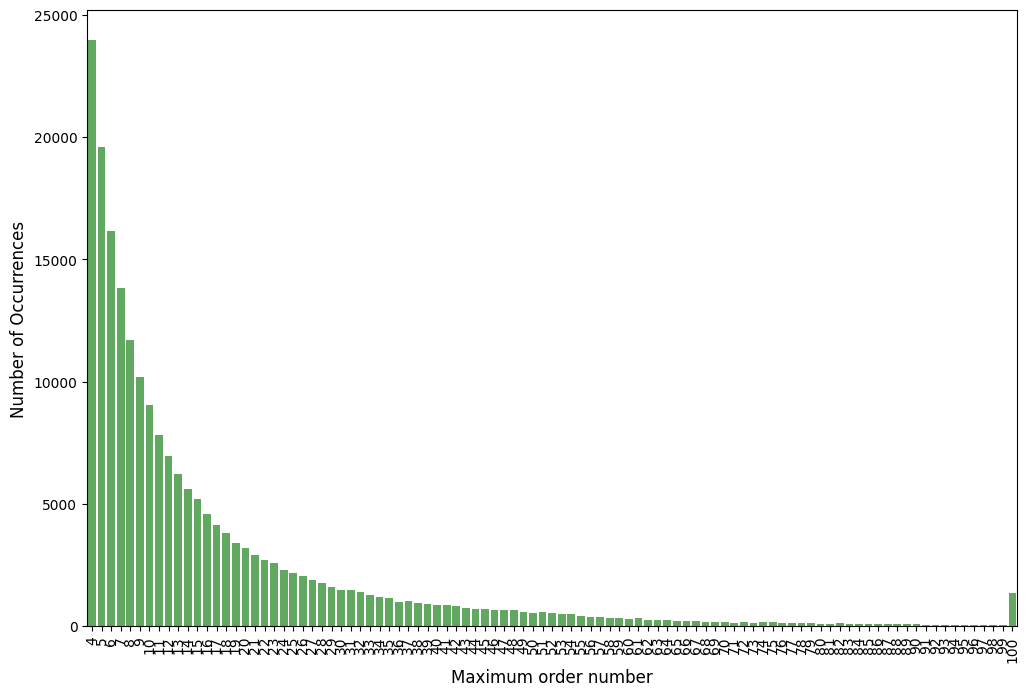

In [10]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

###### So there are no orders less than 4 and is max capped at 100 as given in the data page.
###### Now let us see how the ordering habit changes with day of week.

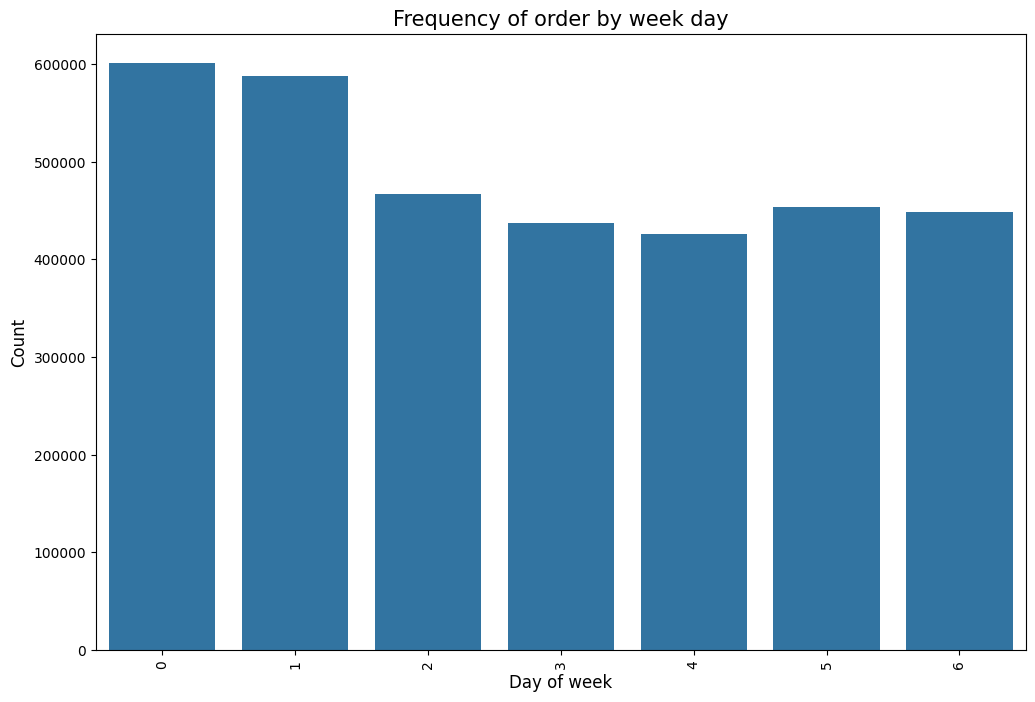

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

###### Seems like 0 and 1 is Saturday and Sunday when the orders are high and low during Wednesday.
###### Now we shall see how the distribution is with respect to time of the day.

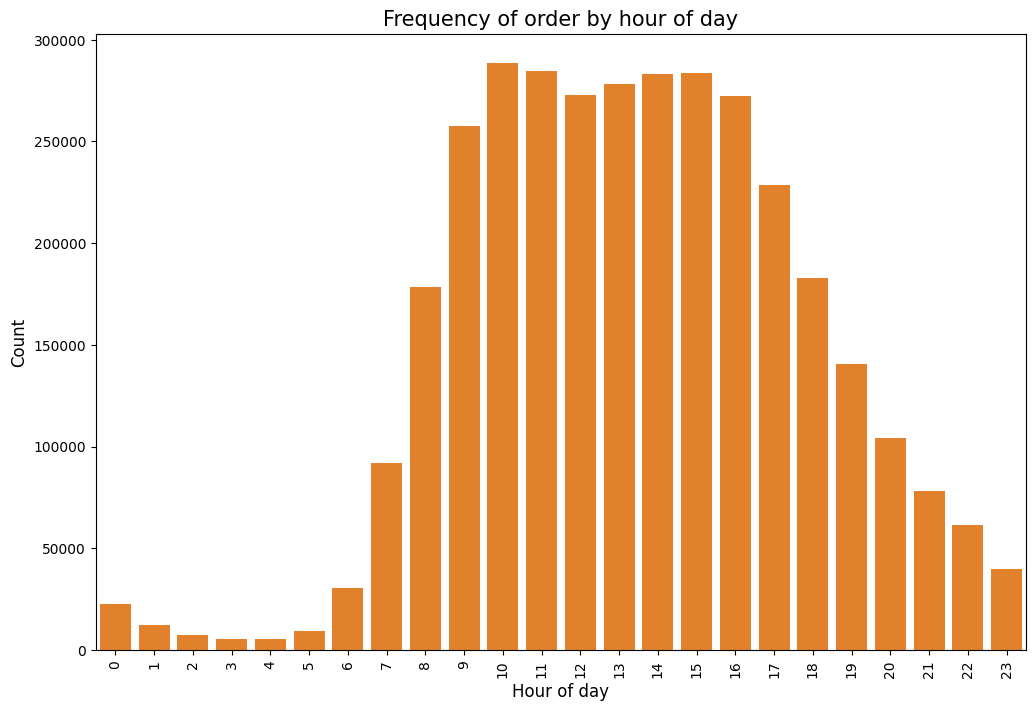

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

###### So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution.

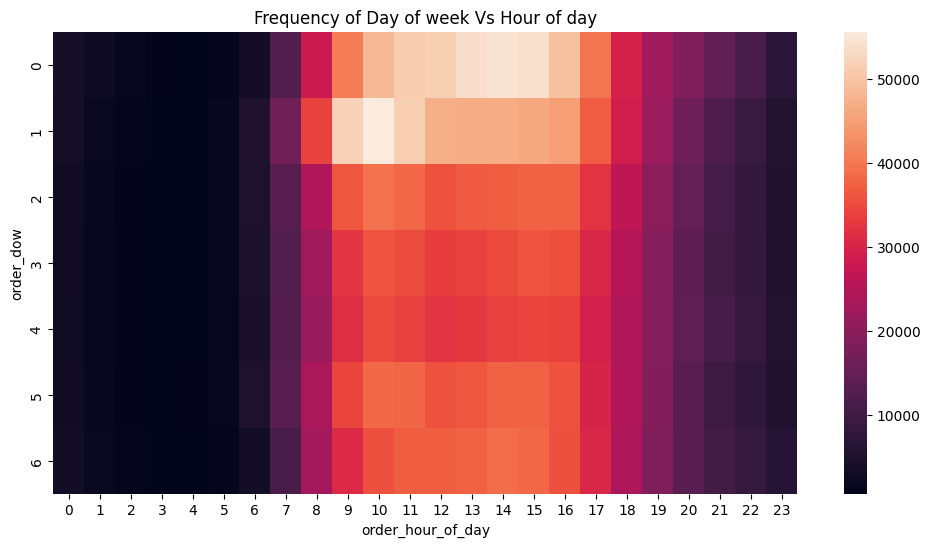

In [13]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot(index = 'order_dow', columns = 'order_hour_of_day', values = 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

###### **pivot()에서 각 인자를 명시하지 않으면 오류 발생**
###### **(1)index**
###### - 새로운 DataFrame의 행 인덱스를 지정
###### **(2)columns**
###### - 새로운 DataFrame의 열 인덱스를 지정
###### **(3)values**
###### - 피벗된 테이블의 값으로 채워질 열

###### Seems Saturday evenings and Sunday mornings are the prime time for orders.
###### Now let us check the time interval between the orders.

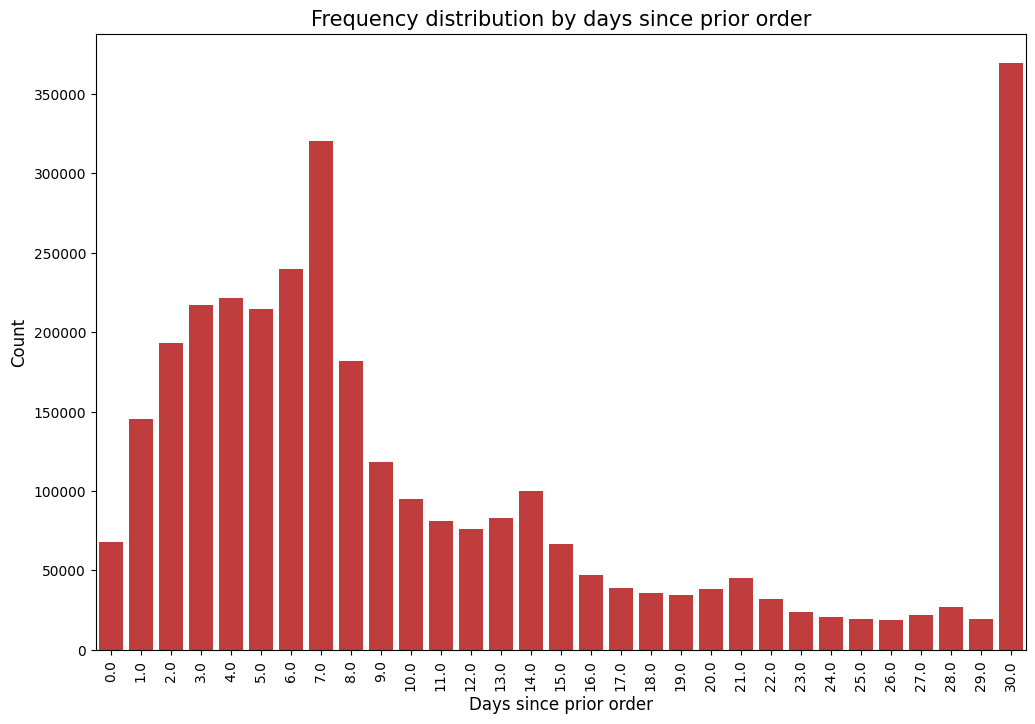

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency distribution by days since prior order', fontsize=15)
plt.show()

###### Looks like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (weekly intervals).
###### Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.

In [15]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

np.float64(0.5896974667922161)

In [16]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

np.float64(0.5985944127509629)

###### On an average, about 59% of the products in an order are re-ordered products.
###### **No re-ordered products:**
###### Now that we have seen 59% of the products are re-ordered, there will also be situations when none of the products are re-ordered. Let us check that now.

In [17]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate('sum').reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

<ipython-input-17-ce503a4d10c3>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1


,count
reordered,
1,0.879151
0,0.120849


###### pandas에서는 ix인덱서가 더 이상 사용되지 않음
###### **loc 또는 iloc 인덱서를 사용해야 함**
###### **loc은 조건에 맞는 값을 수정**
###### **iloc은 인덱스를 번호로 접근할 때 사용**
###### 여기서는 조건을 기반으로 값을 수정하므로 loc가 적절

In [18]:
grouped_df = order_products_train_df.groupby('order_id')['reordered'].aggregate(sum).reset_index()
grouped_df['reordered'].loc[grouped_df['reordered']>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

<ipython-input-18-0240f605eb7d>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped_df = order_products_train_df.groupby('order_id')['reordered'].aggregate(sum).reset_index()
<ipython-input-18-0240f605eb7d>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in 

,count
reordered,
1,0.93444
0,0.06556


###### About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.
###### Now let us see the number of products bought in each order.

<ipython-input-19-0c0fce5214a2>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped_df = order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate(max).reset_index()


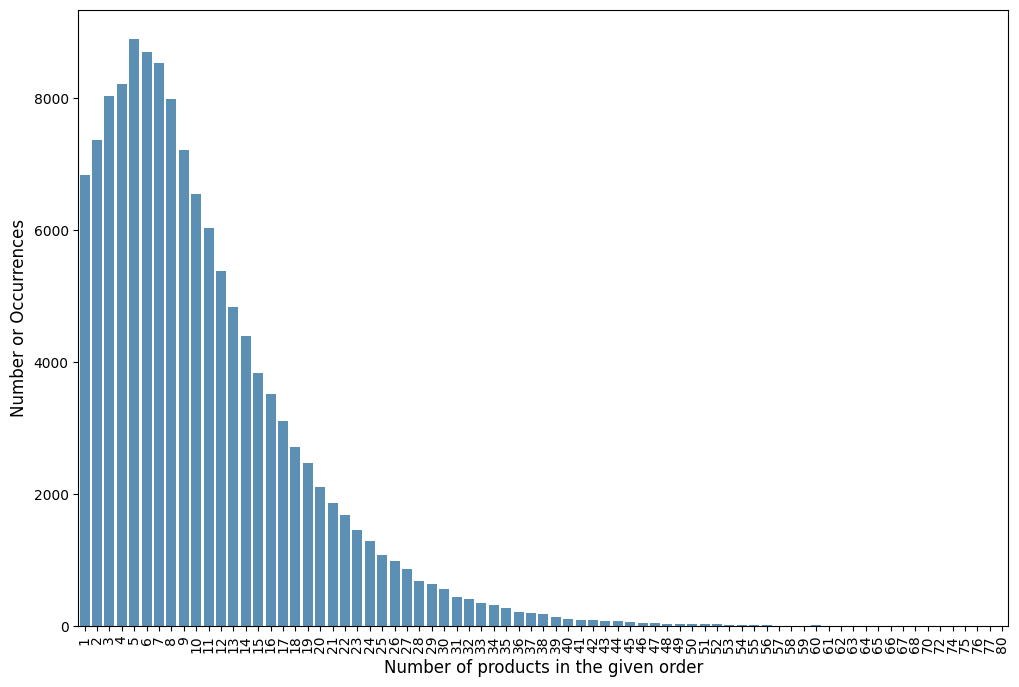

In [19]:
grouped_df = order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate(max).reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number or Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

###### A right tailed distribution with the maximum value at 5!
###### Before we explore the products details, let us look at the other three files as well.

In [20]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [22]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


###### Now let us merge these product details with the order_prior details.

In [23]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [24]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.colunms = ['product_name', 'frequency_count']
cnt_srs

<ipython-input-24-b56f2bfb4937>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cnt_srs.colunms = ['product_name', 'frequency_count']


,product_name,count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


###### Wow. Most of them are organic products! Also majority of them are fruits.
###### Now let us look at the important aisles.

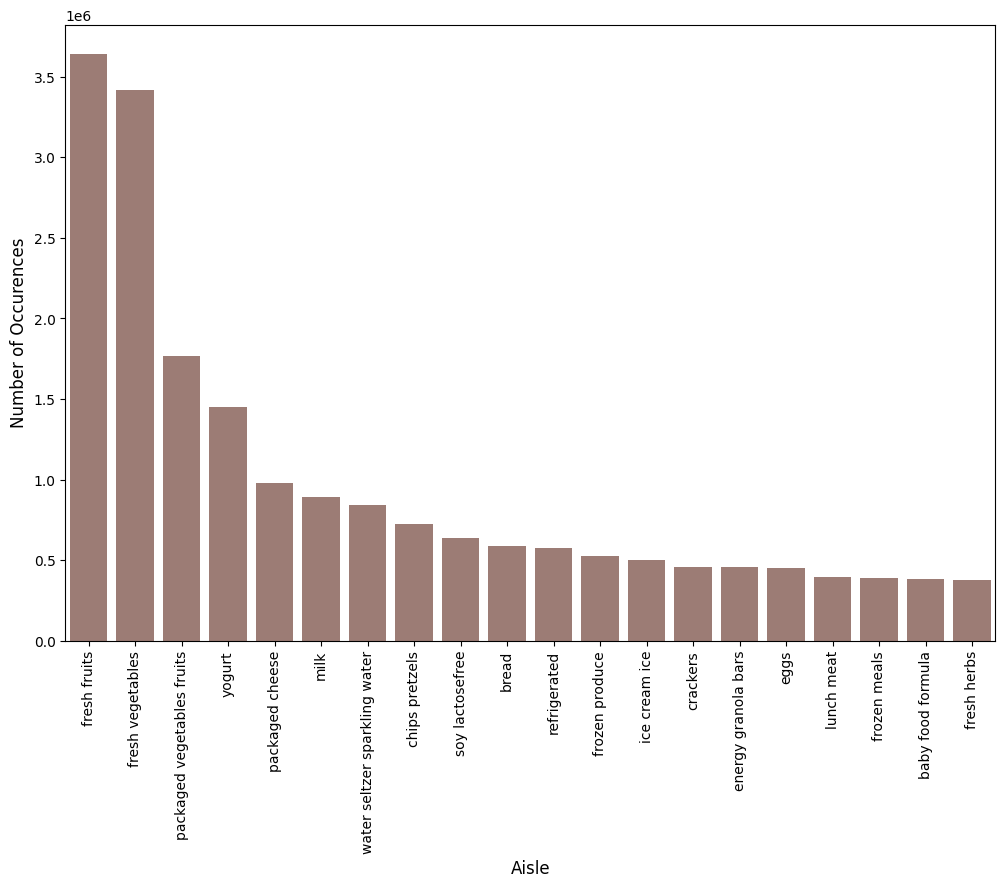

In [25]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Aisle',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

###### The top two aisles are fresh fruits and fresh vegetables!
###### **Department Distribution:**
###### Let us now check the department wise distribution.

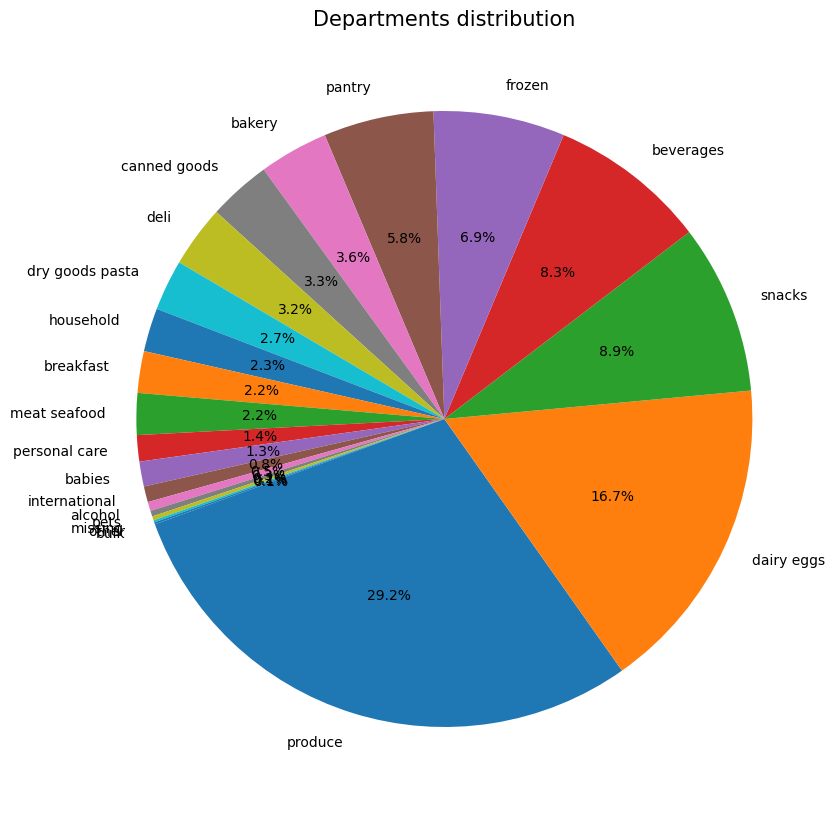

In [26]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title('Departments distribution', fontsize=15)
plt.show()

###### Product is the largest department. Noe let us check the reordered percentage of each department.
###### **Department wise reorder ration:**

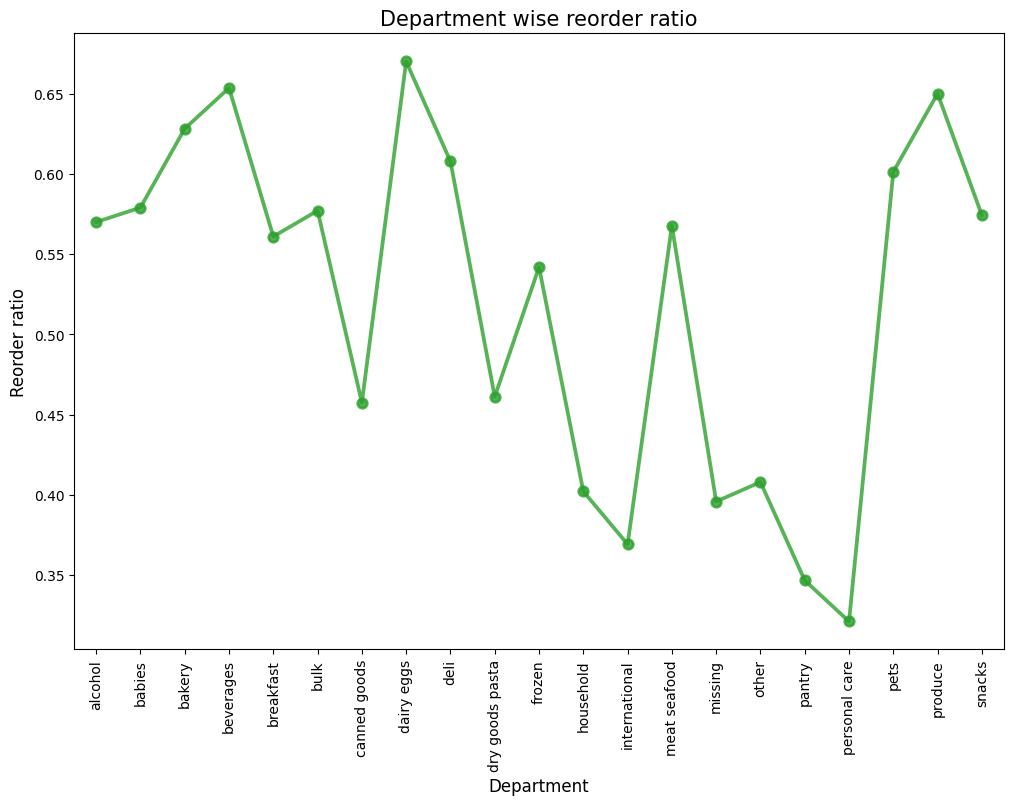

In [39]:
grouped_df = order_products_prior_df.groupby(['department',])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Department wise reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

###### Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

## **새로운 시각화**

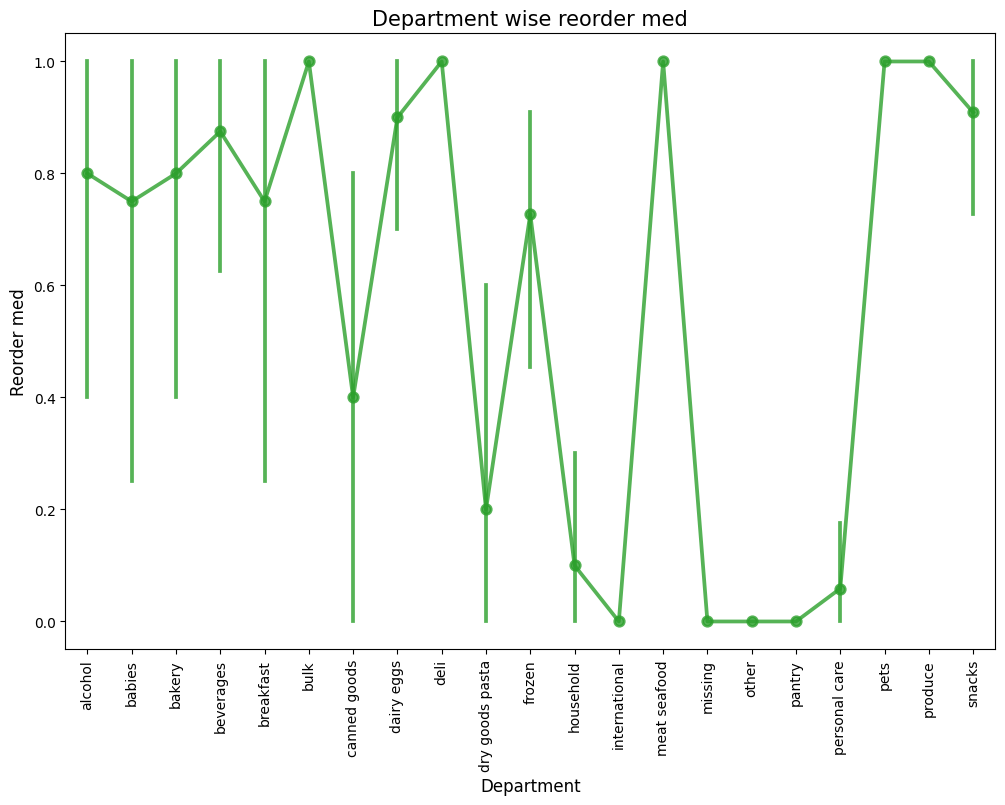

In [41]:
grouped_df = order_products_prior_df.groupby(['department','aisle'])['reordered'].aggregate('median').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder med', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Department wise reorder med', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

##### department, aisle별로 그룹을 짓고 reordered를 센 후 중앙값으로 그림을 그렸다.
##### 중앙값이 아니라 최솟값으로 했을땐 당연하게도 모두 0이 나와 중앙값으로 그리게 되었다.
##### 중앙값으로 그린 그래프는 평균과 비슷한 양상을 보이나 missing, othhr, pantry의 경우 reordered med의 중앙값이 0이다.
##### missing, other, pantry는 재주문을 아예 하지 않거나 재주문을 한다면 많은 양을 재주문하는 특성이 있다.


###### **Aisle - Reorder ratio:**

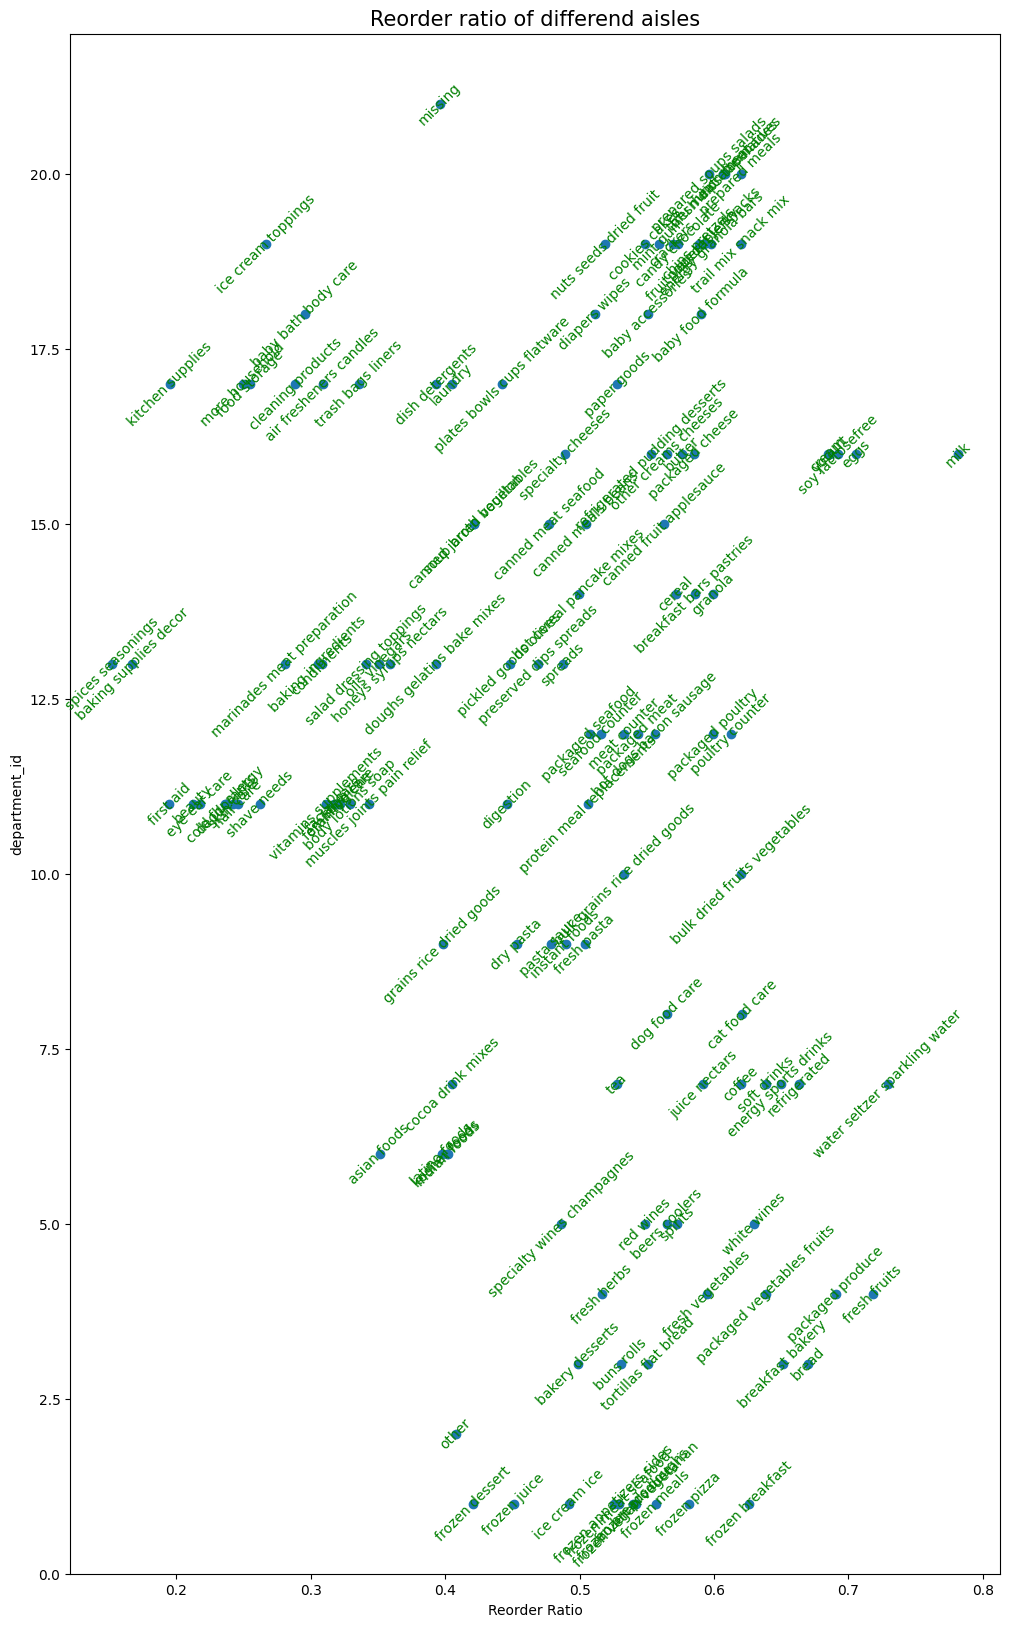

In [28]:
grouped_df = order_products_prior_df.groupby(['department_id','aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(x=grouped_df.reordered.values, y=grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt, (grouped_df.reordered.values[i],grouped_df.department_id.values[i]),rotation=45, ha='center',va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of differend aisles', fontsize=15)
plt.show()

###### **Add to Cart - Reorder ratio:**
###### Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

<ipython-input-29-04f220fb05df>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70] = 70


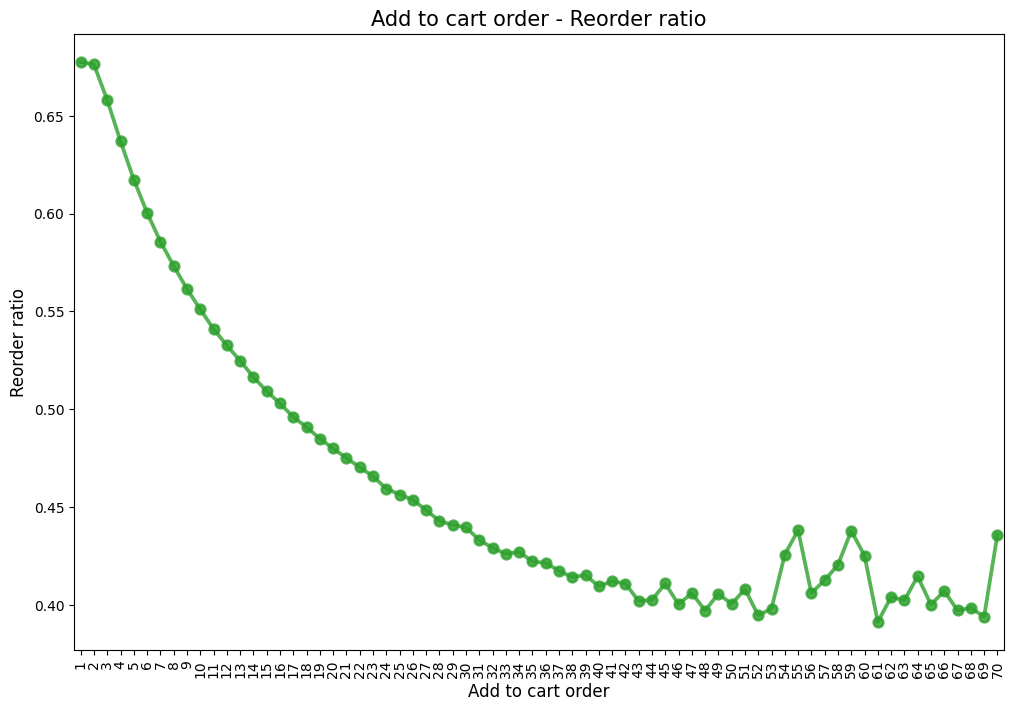

In [29]:
order_products_prior_df['add_to_cart_order_mod'] = order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70] = 70
grouped_df = order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title('Add to cart order - Reorder ratio', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

###### **Looks like the products that are added to cart initially are more likely to be reordered again compared to the ones added later.**
###### This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.
###### **Reorder ratio by Time based variable:**

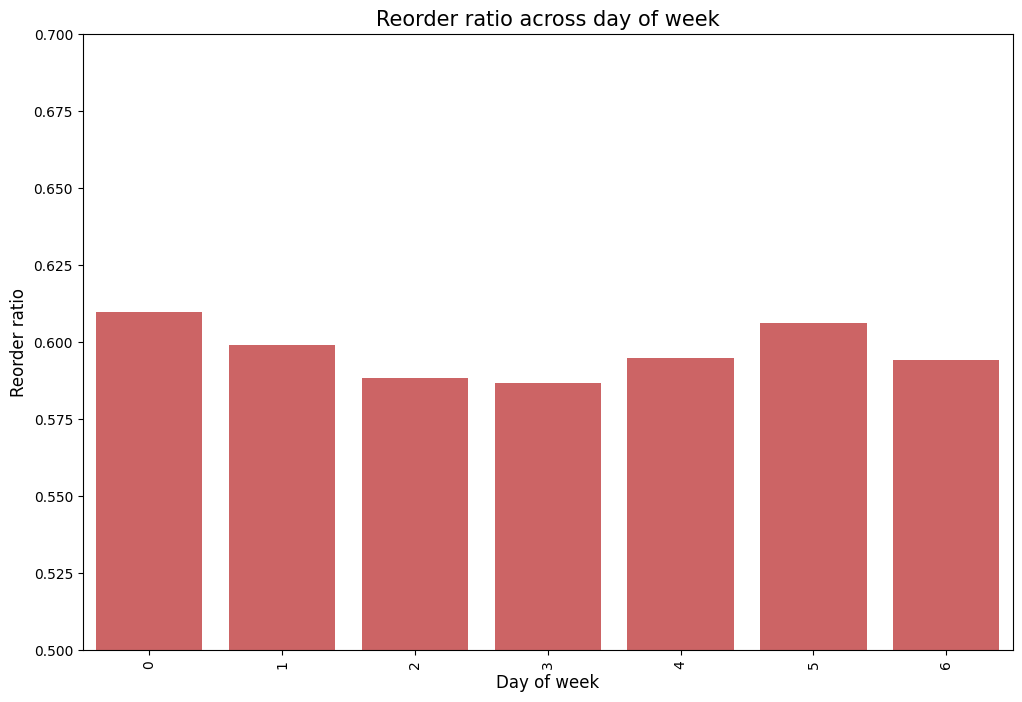

In [30]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(['order_dow'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title('Reorder ratio across day of week', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

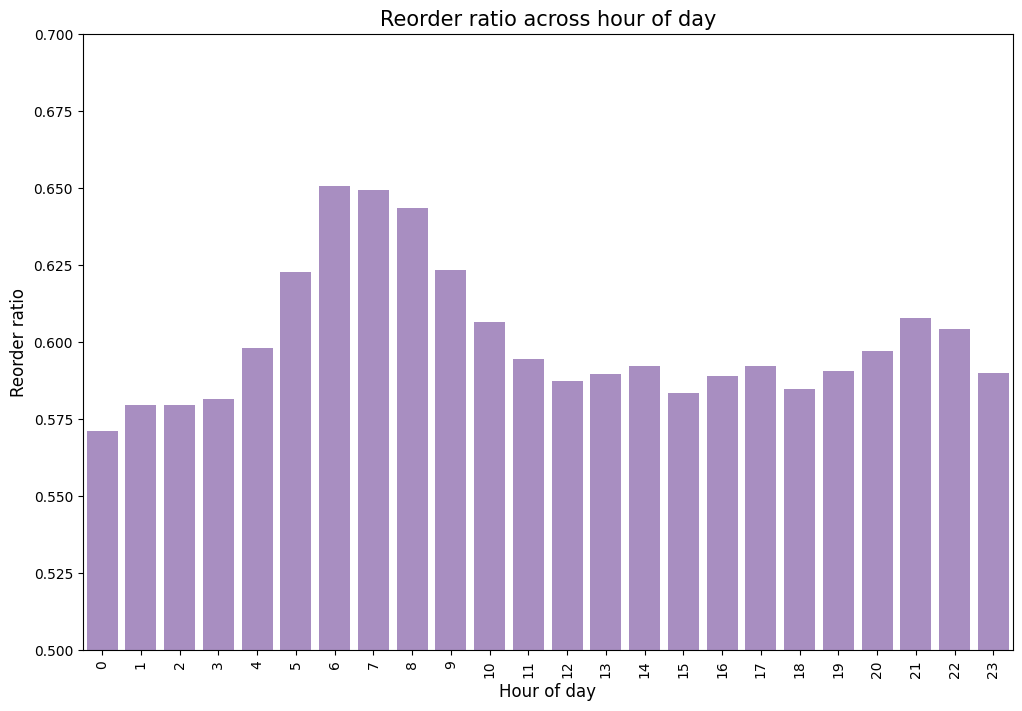

In [31]:
grouped_df = order_products_train_df.groupby(['order_hour_of_day'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title('Reorder ratio across hour of day', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

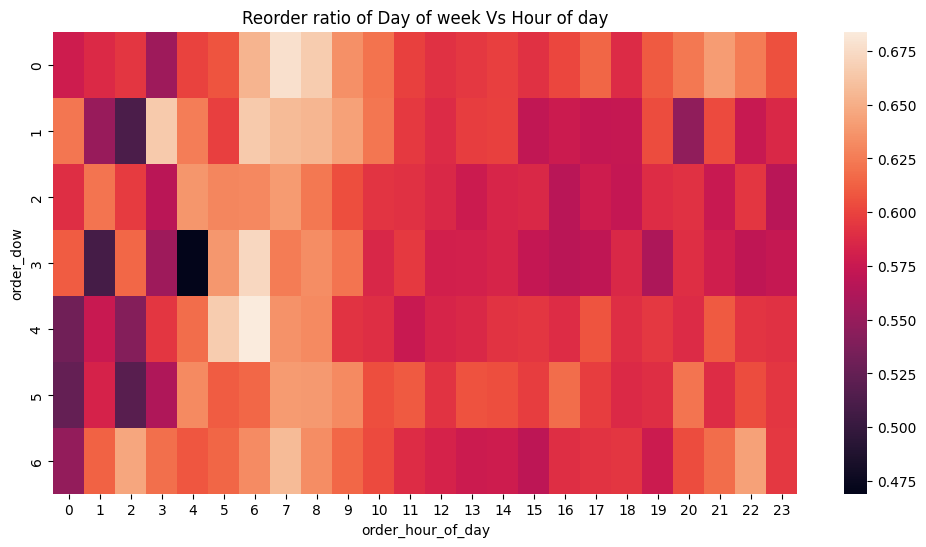

In [32]:
grouped_df = order_products_train_df.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title('Reorder ratio of Day of week Vs Hour of day')
plt.show()

###### Looks like reorder ratios are quite high during the early mornings compared to later half of the day.

###### **Hope it helped. Please leave your comments / suggestions.